Goal here is to produce the visits lists (obsID, fID, band) for visits that fall in WFD, uDDF footprint. 

2 specific scenarios:
- WFD visits in WFD footprint
- DD visits in uDDF footprint

A csv file with relevant info is saved for each visit.

Also, gifs are produced to check the first 100 visits in each case.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import healpy as hp
from copy import deepcopy
import time

In [2]:
repoDir = os.getcwd()
print(repoDir)

/global/u2/a/awan/LSST/lsstRepos/DC2_visitList/DC2visitGen/notebooks


In [3]:
os.chdir('/global/u2/a/awan/LSST/lsstRepos/DC2_visitList/')
!python setup.py install --user

running install
running build
running build_py
running install_lib
running install_egg_info
Removing /global/homes/a/awan/.local/lib/python3.6/site-packages/dc2visitgen-0.1-py3.6.egg-info
Writing /global/homes/a/awan/.local/lib/python3.6/site-packages/dc2visitgen-0.1-py3.6.egg-info


In [4]:
# simdata datapath
dbpath = '/global/cscratch1/sd/awan/dbs_old_unzipped/minion_1016_desc_dithered_v3.db'

In [5]:
# set up
pointingRACol = 'descDitheredRA'
pointingDecCol = 'descDitheredDec'
simDataTag = 'minion1016_v3'
nside = 512

# where the data will be saved
tag = 'protoDC2Visits_nside%s'%(nside)
outDir = '%s/../%s/'%(repoDir, tag)
outDir_gifs = '/global/homes/a/awan/desc/DC2_GIFS/%s/'%tag

#### Set up the regions

In [6]:
regionCorners= {}
regionCorners['WFD']= [[57.87, -27.25], [58.02, -32.25], [52.11, -32.25], [52.25, -27.25]]
regionCorners['DD']= [[53.764, -27.533], [53.771, -28.667], [52.479, -28.667], [52.486, -27.533]]

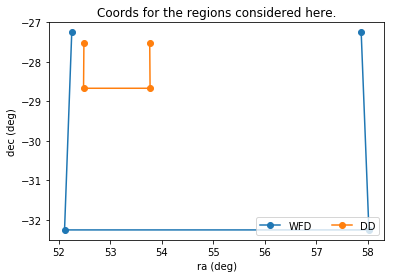

In [7]:
# plot the regions to check whats up
for key in regionCorners.keys():    
    xs, ys= [], []
    for x, y in regionCorners[key]:
        xs.append(x)
        ys.append(y)
    plt.plot(xs, ys, 'o-', label= key)
plt.legend(loc="lower right", ncol= 2)
plt.title('Coords for the regions considered here.')
plt.xlabel('ra (deg)')
plt.ylabel('dec (deg)')
plt.show()

#### Find the visits.

In [8]:
from dc2visitgen import getDC2VisitList

In [9]:
simdata, regionPixels, obsIDsList, fIDsList, bandList= {}, {}, {}, {}, {}

In [10]:
%%time
# get WFD visits that fall in the WFD footprint
startTime = time.time()
surveyRegionTag = 'WFD'

out = getDC2VisitList(dbpath, simDataTag, surveyRegionTag, pointingRACol, pointingDecCol,
                     outDir, nside, regionCorners[surveyRegionTag],
                      filters=['u', 'g', 'r', 'i', 'z', 'y'], outFileTag='WFDvisitsInWFD')

simdata[surveyRegionTag], regionPixels[surveyRegionTag], obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag] = out

print('\nTime taken: %.3f (min)'%((time.time()-startTime)/60.))

###### lsst.sims.maf.__version__: 2.9.0.sims

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database Summary with no constraint for columns ['descDitheredRA', 'fiveSigmaDepth', 'descDitheredDec'].
Found 2194905 visits
Running:  ['pixelGrid']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

Finding the visit list.
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes

##Total number of unique visits in the region (across all bands): 8389

Total number of unique visits in the region for u band: 572
fIDs: [1178 1188 1214 1226 1277 1297 1309 1331 1401 1419 1427 1445 1522 1546 1566]

Total number of unique visits in the region for g band: 822
fIDs: [1178 1188 1214 1226 1277 1297 1309 1331 1401 1419 1427 1445 1522 1546 1566]

Total number of unique visits in the region for r band: 1825
fIDs: [1178 1188 1214 1226 1277 1297 1309 1331 1401 1419 1427 1445 1522 1546 1566]

Total number of unique

In [11]:
%%time
# get DD visits that fall in the uDDF footprint
startTime= time.time()
surveyRegionTag= 'DD'

out= getDC2VisitList(dbpath, simDataTag, surveyRegionTag, pointingRACol, pointingDecCol,
                     outDir, nside, regionCorners[surveyRegionTag],
                    filters= ['u', 'g', 'r', 'i', 'z', 'y'], outFileTag= 'DDvisitsInuDD')

simdata[surveyRegionTag], regionPixels[surveyRegionTag], obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag]= out
print('\nTime taken: %.3f (min)'%((time.time()-startTime)/60.))

###### lsst.sims.maf.__version__: 2.9.0.sims

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database Summary with no constraint for columns ['descDitheredRA', 'fiveSigmaDepth', 'descDitheredDec'].
Found 2194905 visits
Running:  ['pixelGrid']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

Finding the visit list.
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes

##Total number of unique visits in the region (across all bands): 23160

Total number of unique visits in the region for u band: 4963
fIDs: [1427]

Total number of unique visits in the region for g band: 1911
fIDs: [1427]

Total number of unique visits in the region for r band: 3796
fIDs: [1427]

Total number of unique visits in the region for i band: 3818
fIDs: [1427]

Total number of unique visits in the region for z band: 4930
fIDs: [1427]

Total number of unique visits in the region for y band: 3742
fIDs: [1427]

Save

#### Plot the sims for checks.

In [12]:
from dc2visitgen import DC2VisitsSim

In [13]:
ras, decs = [], []
for key in regionCorners:
    for i in regionCorners[key]:
        ras.append(i[0])
        decs.append(i[1])
    
minRA, maxRA = min(ras), max(ras)
minDec, maxDec = min(decs), max(decs)

In [14]:
%%time
surveyRegionTag = 'WFD'
DC2VisitsSim(outDir_gifs, 'WFD_test', simdata[surveyRegionTag], pointingRACol, pointingDecCol,
             obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag],
             regionPixels_WFD=regionPixels['WFD'], regionPixels_DD=regionPixels['DD'],
             nside=nside, obsHistIndMin=0, obsHistIndMax=100,
             minRA=minRA, maxRA=maxRA, minDec=minDec, maxDec=maxDec)

Saved hIDs_0-100Index_WFD_test_nside512.gif
CPU times: user 30.2 s, sys: 4.36 s, total: 34.6 s
Wall time: 34.9 s


In [15]:
%%time
surveyRegionTag = 'DD'
DC2VisitsSim(outDir_gifs, 'uDD_test', simdata[surveyRegionTag], pointingRACol, pointingDecCol,
             obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag],
             regionPixels_WFD=regionPixels['WFD'], regionPixels_DD=regionPixels['DD'],
             nside=nside, obsHistIndMin=0, obsHistIndMax=100,
             minRA=minRA, maxRA=maxRA, minDec=minDec, maxDec=maxDec)

Saved hIDs_0-100Index_uDD_test_nside512.gif
CPU times: user 27.3 s, sys: 3.34 s, total: 30.6 s
Wall time: 30.7 s


In [16]:
%%time
#### higher res.
surveyRegionTag= 'WFD'
DC2VisitsSim(outDir_gifs, 'WFD_test_highres', simdata[surveyRegionTag], pointingRACol, pointingDecCol,
             obsIDsList[surveyRegionTag], fIDsList[surveyRegionTag], bandList[surveyRegionTag],
             regionPixels_WFD=regionPixels['WFD'], regionPixels_DD=regionPixels['DD'],
             nside=nside, obsHistIndMin=0, obsHistIndMax=100, dpi=60,
             minRA=minRA, maxRA=maxRA, minDec=minDec, maxDec=maxDec)

Saved hIDs_0-100Index_WFD_test_highres_nside512.gif
CPU times: user 35.6 s, sys: 3.59 s, total: 39.2 s
Wall time: 39.3 s


In [17]:
# estimate the region area using the area in the HP pixels
for key in regionPixels:
    print('%s: %s deg2'%(key, len(regionPixels[key])*hp.nside2pixarea(nside, degrees=True)))

WFD: 27.0409921316 deg2
DD: 1.71792918004 deg2
